In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pd.set_option('display.max_colwidth', None)

In [10]:
data_dic = pd.read_csv("./Telecom Churn Data Dictionary.csv", encoding=' ISO8859')
data_dic

,S.No.,Variable Name,Meaning
0,1,CustomerID,The unique ID of each customer
1,2,Gender,The gender of a person
2,3,SeniorCitizen,Whether a customer can be classified as a senior citizen.
3,4,Partner,If a customer is married/ in a live-in relationship.
4,5,Dependents,If a customer has dependents (children/ retired parents)
5,6,Tenure,The time for which a customer has been using the service.
6,7,PhoneService,Whether a customer has a landline phone service along with the internet service.
7,8,MultipleLines,Whether a customer has multiple lines of internet connectivity.
8,9,InternetService,The type of internet services chosen by the customer.
9,10,OnlineSecurity,Specifies if a customer has online security.


In [2]:
churn = pd.read_csv("./churn_data.csv")
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [12]:
customer = pd.read_csv("./customer_data.csv")
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [13]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [14]:
internet = pd.read_csv("./internet_data.csv")
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   MultipleLines     7043 non-null   object
 2   InternetService   7043 non-null   object
 3   OnlineSecurity    7043 non-null   object
 4   OnlineBackup      7043 non-null   object
 5   DeviceProtection  7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingTV       7043 non-null   object
 8   StreamingMovies   7043 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


In [16]:
cust_internet_df = customer.merge(internet, how='inner', on='customerID')
cust_internet_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [17]:
telecom_churn = cust_internet_df.merge(churn, how='inner', on='customerID')
telecom_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
telecom_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

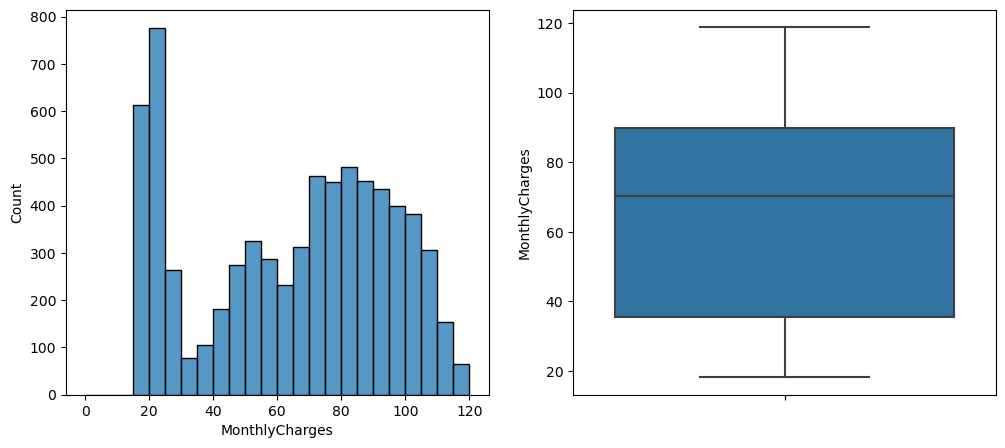

In [59]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
_bins= [item for item in np.arange(0, 125, 5)]
sns.histplot(x='MonthlyCharges',  data=telecom_churn, bins=_bins)

plt.subplot(1, 2, 2)
sns.boxplot(y='MonthlyCharges', data=telecom_churn)
plt.show()

In [43]:
telecom_churn['TotalCharges'].value_counts().reset_index().sort_values(by='index', ascending=False)

,index,TotalCharges
5306,999.9,1
5456,999.8,1
1359,999.45,1
2791,998.1,1
2478,997.75,1
...,...,...
5944,100.4,1
3911,100.35,1
1534,100.25,1
4415,100.2,1


In [49]:
telecom_churn['MonthlyCharges'].value_counts().reset_index().sort_values(by='index', ascending=False)

,index,MonthlyCharges
1258,118.75,1
1444,118.65,1
1000,118.60,2
1229,118.35,1
1317,118.20,1
...,...,...
1241,18.75,1
1104,18.70,2
1311,18.55,1
1387,18.40,1


In [39]:
telecom_churn['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [38]:
telecom_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [37]:
telecom_churn['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [65]:
telecom_churn['tenure'].value_counts().reset_index().sort_values(by='index', ascending=False)

,index,tenure
1,72,362
5,71,170
9,70,119
20,69,95
15,68,100
...,...,...
4,4,176
3,3,200
2,2,238
0,1,613


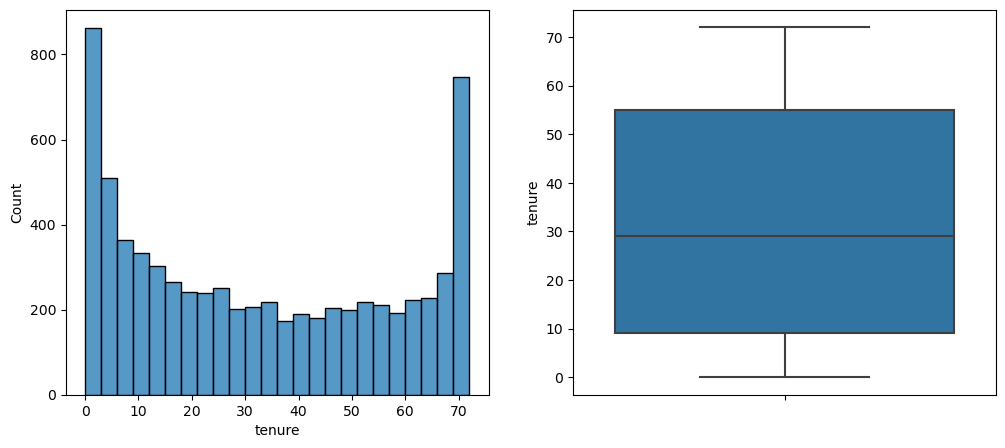

In [69]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
_bins= [item for item in np.arange(0, 75, 3)]
sns.histplot(x='tenure',  data=telecom_churn, bins=_bins)

plt.subplot(1, 2, 2)
sns.boxplot(y='tenure', data=telecom_churn)
plt.show()

In [86]:
# convert churn column in binary
is_churn_column_converted_into_binary = telecom_churn['Churn'].isin([1]).any(axis=0)
print(is_churn_column_converted_into_binary)

True


In [95]:
is_churn_column_converted_into_binary_2 = 1 in telecom_churn['Churn']
print(is_churn_column_converted_into_binary_2)

True


In [87]:
if not is_churn_column_converted_into_binary:
    telecom_churn['Churn'] = telecom_churn['Churn'].str.lower().map({'yes': 1, 'no': 0 })
else:
    print("churn_column_has_been_converted_into_binary")

churn_column_has_been_converted_into_binary


In [85]:
telecom_churn['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

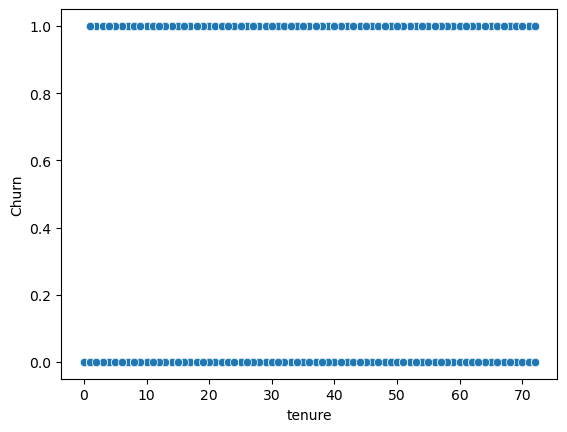

In [96]:
sns.scatterplot(x='tenure', y='Churn', data=telecom_churn)
plt.show()

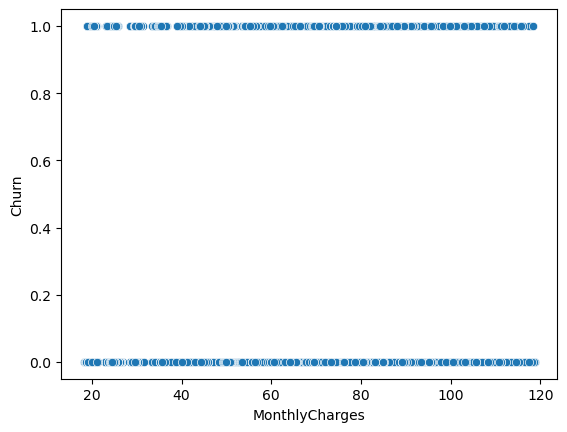

In [97]:
sns.scatterplot(x='MonthlyCharges', y='Churn', data=telecom_churn)
plt.show()

In [88]:
print(is_churn_column_converted_into_binary)

True


In [32]:
telecom_churn['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [34]:
telecom_churn['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [35]:
telecom_churn['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [30]:
telecom_churn['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [28]:
telecom_churn['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [26]:
telecom_churn['Partner'].value_counts().reset_index()

,index,Partner
0,No,3641
1,Yes,3402


In [27]:
telecom_churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

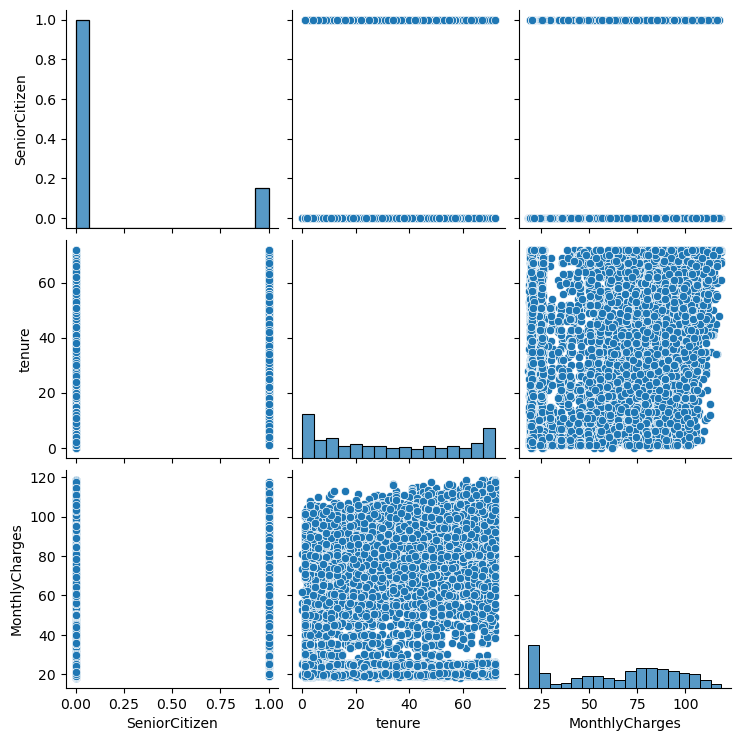

In [60]:
sns.pairplot(telecom_churn)
plt.show()

<AxesSubplot:>

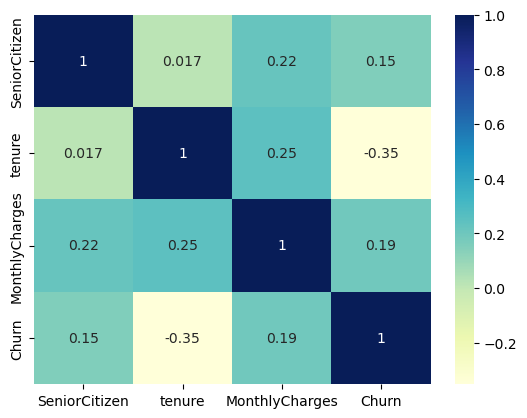

In [100]:
sns.heatmap(telecom_churn.corr(), annot=True, cmap='YlGnBu')